## Linear 3D ODE

In [5]:
pip install pysindy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from scipy.integrate import solve_ivp
from scipy.io import loadmat

from pysindy.utils import linear_3D
import pysindy as ps

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

# ignore user warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

np.random.seed(1000)  # Seed for reproducibility

# Integrator keywords for solve_ivp
integrator_keywords = {}
integrator_keywords['rtol'] = 1e-12
integrator_keywords['method'] = 'LSODA'
integrator_keywords['atol'] = 1e-12

Linear 3D ODE
This example shows a demonstration of SINDy to identify of a linear system in three dimensions. The governing equations are given by the following system.

$$ \frac{d}{dt}\begin{bmatrix}x \\ y \\ z \end{bmatrix} = \begin{bmatrix}-0.1 & -2 & 0 \\ 2 & -0.1 & 0 \\ 0 & 0 & -0.3 \end{bmatrix} \begin{bmatrix}x \\ y \\ z \end{bmatrix} $$

In [7]:
# Generate training data

dt = 0.001
t_train = np.arange(0, 100, dt)
t_train_span = (t_train[0], t_train[-1])
x0_train = [2, 0, 1]
x_train = solve_ivp(linear_3D, t_train_span, 
                    x0_train, t_eval=t_train, **integrator_keywords).y.T

In [8]:
print("total number of samples:",len(x_train))

total number of samples: 100000


In [9]:
#finding the best hyperparameters

model = ps.SINDy(t_default=dt)

param_grid = {
    "optimizer__threshold": [0.001, 0.01, 0.1],
    "feature_library": [ps.PolynomialLibrary(), ps.FourierLibrary()],
}

search = GridSearchCV(
    model,
    param_grid,
    cv=TimeSeriesSplit(n_splits=5)
)

search.fit(x_train)

print("Best parameters:", search.best_params_)
search.best_estimator_.print()

Best parameters: {'feature_library': PolynomialLibrary(), 'optimizer__threshold': 0.001}
(x0)' = -0.100 x0 + 2.000 x1
(x1)' = -2.000 x0 + -0.100 x1
(x2)' = -0.300 x2


In [10]:
# Fit the model with best hyperparameters

poly_order = 1
threshold = 0.001

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order)
)
model.fit(x_train, t=dt)
model.print()

(x0)' = -0.100 x0 + 2.000 x1
(x1)' = -2.000 x0 + -0.100 x1
(x2)' = -0.300 x2


In [11]:
# Simulate and plot the results
x_sim = model.simulate(x0_train, t_train)
plot_kws = dict(linewidth=2)
plot_kws1 = dict(linewidth=1)

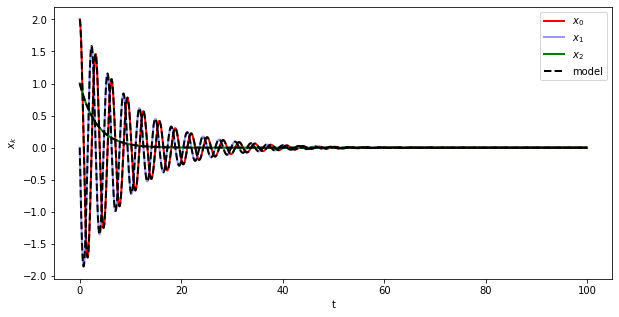

In [12]:
fig = plt.figure(figsize=(10, 5))
plt.plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
plt.plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
plt.plot(t_train, x_train[:, 2], "g", label="$x_2$", **plot_kws)
plt.plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
plt.plot(t_train, x_sim[:, 1], "k--", **plot_kws)
plt.plot(t_train, x_sim[:, 2], "k--", **plot_kws)
plt.legend()
plt.xlabel("t")
plt.ylabel("$x_k$")
fig.show()

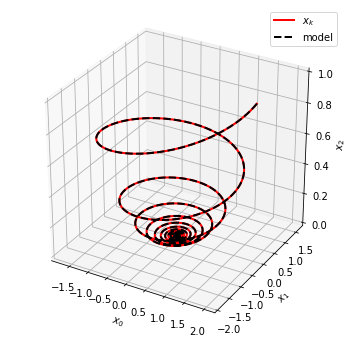

In [13]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot(x_train[:, 0], x_train[:, 1], x_train[:, 2], "r", label="$x_k$", **plot_kws)
ax.plot(x_sim[:, 0], x_sim[:, 1], x_sim[:, 2], "k--", label="model", **plot_kws)
ax.set(xlabel="$x_0$", ylabel="$x_1$", zlabel="$x_2$")
ax.legend()
fig.show()

### Observations for varying levels of noise

(x0)' = -0.100 x0 + 2.000 x1
(x1)' = -2.000 x0 + -0.100 x1
(x2)' = -0.300 x2


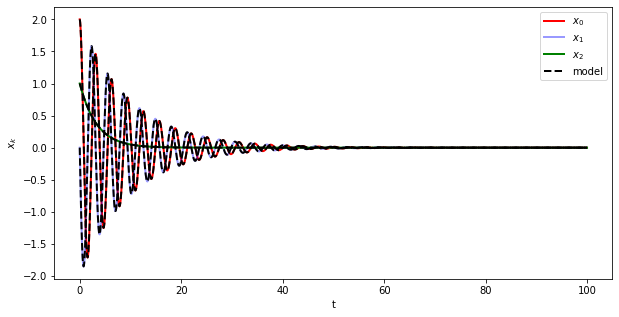

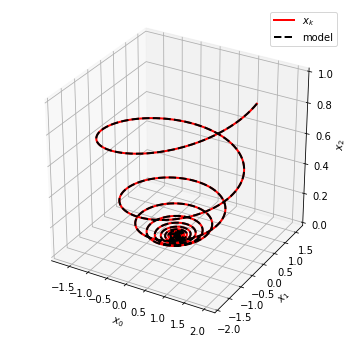

In [14]:
#adding noise on a scale of 1e-4
poly_order = 1
threshold = 0.001

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order)
)
model.fit(x_train + np.random.normal(scale=1e-4, size=x_train.shape), t=dt, quiet=True)
model.print()

x_sim = model.simulate(x0_train, t_train) 
plot_kws = dict(linewidth=2)

fig = plt.figure(figsize=(10, 5))
plt.plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
plt.plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
plt.plot(t_train, x_train[:, 2], "g", label="$x_2$", **plot_kws)
plt.plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
plt.plot(t_train, x_sim[:, 1], "k--", **plot_kws)
plt.plot(t_train, x_sim[:, 2], "k--", **plot_kws)
plt.legend()
plt.xlabel("t")
plt.ylabel("$x_k$")
fig.show()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot(x_train[:, 0], x_train[:, 1], x_train[:, 2], "r", label="$x_k$", **plot_kws)
ax.plot(x_sim[:, 0], x_sim[:, 1], x_sim[:, 2], "k--", label="model", **plot_kws)
ax.set(xlabel="$x_0$", ylabel="$x_1$", zlabel="$x_2$")
ax.legend()
fig.show()

(x0)' = -0.100 x0 + 2.000 x1
(x1)' = -2.000 x0 + -0.100 x1
(x2)' = -0.303 x2


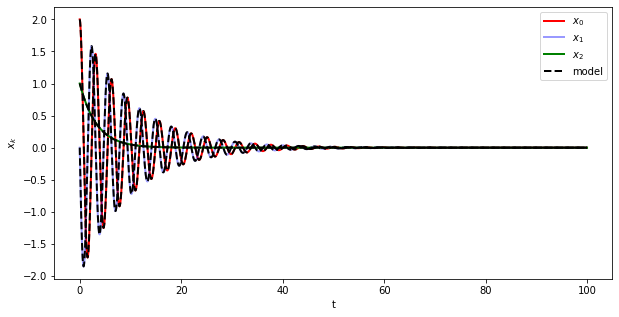

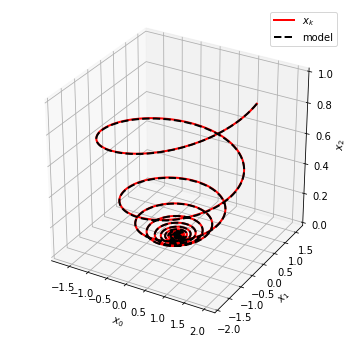

In [15]:
# adding noise on a scale of 1e-3
poly_order = 1
threshold = 0.001

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order)
)
model.fit(x_train + np.random.normal(scale=1e-3, size=x_train.shape), t=dt, quiet=True)
model.print()

x_sim = model.simulate(x0_train, t_train) 
plot_kws = dict(linewidth=2)

fig = plt.figure(figsize=(10, 5))
plt.plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
plt.plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
plt.plot(t_train, x_train[:, 2], "g", label="$x_2$", **plot_kws)
plt.plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
plt.plot(t_train, x_sim[:, 1], "k--", **plot_kws)
plt.plot(t_train, x_sim[:, 2], "k--", **plot_kws)
plt.legend()
plt.xlabel("t")
plt.ylabel("$x_k$")
fig.show()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot(x_train[:, 0], x_train[:, 1], x_train[:, 2], "r", label="$x_k$", **plot_kws)
ax.plot(x_sim[:, 0], x_sim[:, 1], x_sim[:, 2], "k--", label="model", **plot_kws)
ax.set(xlabel="$x_0$", ylabel="$x_1$", zlabel="$x_2$")
ax.legend()
fig.show()

(x0)' = -0.098 x0 + 1.997 x1 + 0.016 x2
(x1)' = -0.001 1 + -1.989 x0 + -0.094 x1 + 0.051 x2
(x2)' = -0.006 x0 + -0.005 x1 + -0.313 x2


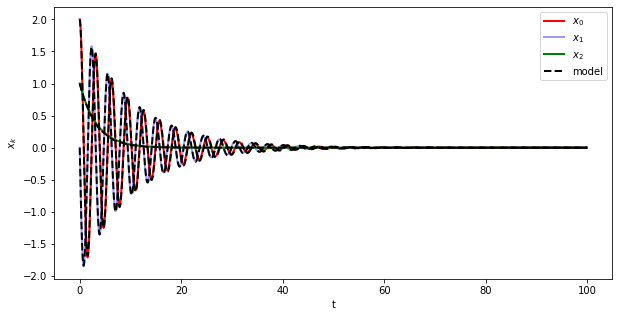

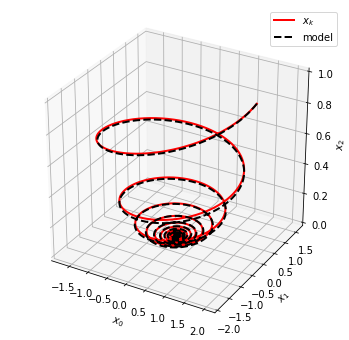

In [16]:
# adding noise on a scale of 1e-2
poly_order = 1
threshold = 0.001

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order)
)
model.fit(x_train + np.random.normal(scale=1e-2, size=x_train.shape), t=dt, quiet=True)
model.print()

x_sim = model.simulate(x0_train, t_train) 
plot_kws = dict(linewidth=2)

fig = plt.figure(figsize=(10, 5))
plt.plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
plt.plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
plt.plot(t_train, x_train[:, 2], "g", label="$x_2$", **plot_kws)
plt.plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
plt.plot(t_train, x_sim[:, 1], "k--", **plot_kws)
plt.plot(t_train, x_sim[:, 2], "k--", **plot_kws)
plt.legend()
plt.xlabel("t")
plt.ylabel("$x_k$")
fig.show()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot(x_train[:, 0], x_train[:, 1], x_train[:, 2], "r", label="$x_k$", **plot_kws)
ax.plot(x_sim[:, 0], x_sim[:, 1], x_sim[:, 2], "k--", label="model", **plot_kws)
ax.set(xlabel="$x_0$", ylabel="$x_1$", zlabel="$x_2$")
ax.legend()
fig.show()

(x0)' = -0.013 1 + -0.103 x0 + 1.587 x1 + 0.215 x2
(x1)' = -0.006 1 + -1.602 x0 + -0.060 x1 + 0.181 x2
(x2)' = -0.007 1 + -0.080 x0 + -0.051 x1 + -0.176 x2


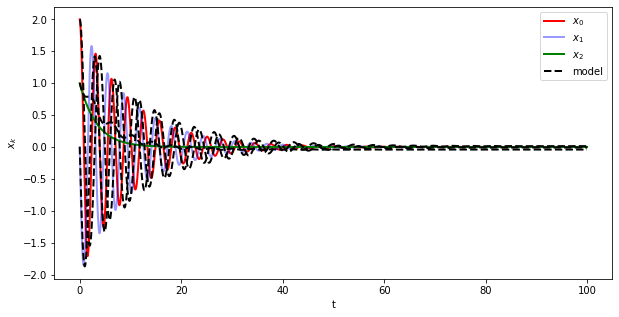

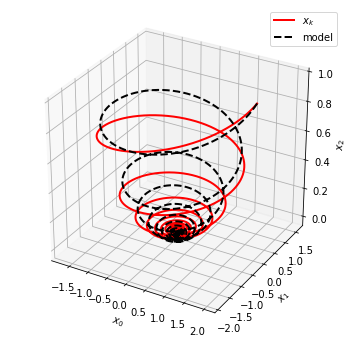

In [17]:
# adding noise on a scale of 1e-1
poly_order = 1
threshold = 0.001

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order)
)
model.fit(x_train + np.random.normal(scale=1e-1, size=x_train.shape), t=dt, quiet=True)
model.print()

x_sim = model.simulate(x0_train, t_train) 
plot_kws = dict(linewidth=2)

fig = plt.figure(figsize=(10, 5))
plt.plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
plt.plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
plt.plot(t_train, x_train[:, 2], "g", label="$x_2$", **plot_kws)
plt.plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
plt.plot(t_train, x_sim[:, 1], "k--", **plot_kws)
plt.plot(t_train, x_sim[:, 2], "k--", **plot_kws)
plt.legend()
plt.xlabel("t")
plt.ylabel("$x_k$")
fig.show()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot(x_train[:, 0], x_train[:, 1], x_train[:, 2], "r", label="$x_k$", **plot_kws)
ax.plot(x_sim[:, 0], x_sim[:, 1], x_sim[:, 2], "k--", label="model", **plot_kws)
ax.set(xlabel="$x_0$", ylabel="$x_1$", zlabel="$x_2$")
ax.legend()
fig.show()

(x0)' = 0.023 1 + -0.026 x0 + -4.321 x1 + -0.924 x2
(x1)' = 0.060 1 + 4.345 x0 + -0.005 x1 + -1.804 x2
(x2)' = 0.041 1 + 0.812 x0 + 1.697 x1 + 0.010 x2


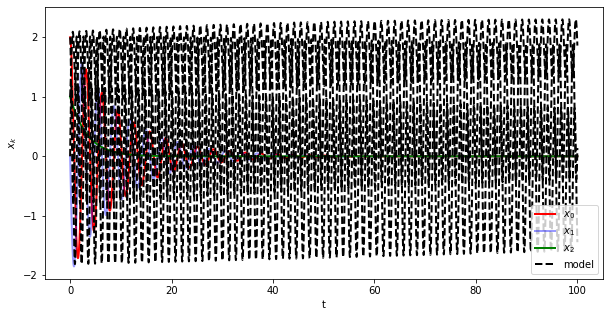

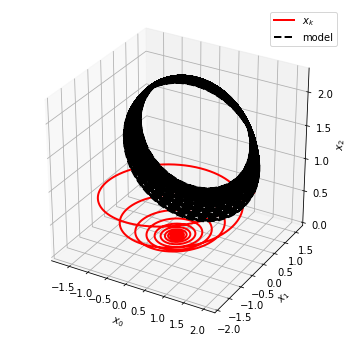

In [18]:
# adding noise on a scale of 1
poly_order = 1
threshold = 0.001

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order)
)
model.fit(x_train + np.random.normal(scale=1e-0, size=x_train.shape), t=dt, quiet=True)
model.print()

x_sim = model.simulate(x0_train, t_train) 
plot_kws = dict(linewidth=2)

fig = plt.figure(figsize=(10, 5))
plt.plot(t_train, x_train[:, 0], "r", label="$x_0$", **plot_kws)
plt.plot(t_train, x_train[:, 1], "b", label="$x_1$", alpha=0.4, **plot_kws)
plt.plot(t_train, x_train[:, 2], "g", label="$x_2$", **plot_kws)
plt.plot(t_train, x_sim[:, 0], "k--", label="model", **plot_kws)
plt.plot(t_train, x_sim[:, 1], "k--", **plot_kws)
plt.plot(t_train, x_sim[:, 2], "k--", **plot_kws)
plt.legend()
plt.xlabel("t")
plt.ylabel("$x_k$")
fig.show()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot(x_train[:, 0], x_train[:, 1], x_train[:, 2], "r", label="$x_k$", **plot_kws)
ax.plot(x_sim[:, 0], x_sim[:, 1], x_sim[:, 2], "k--", label="model", **plot_kws)
ax.set(xlabel="$x_0$", ylabel="$x_1$", zlabel="$x_2$")
ax.legend()
fig.show()

### Trying to find amonut of data required for a particular level of noise

no noise

In [19]:
# considering only 0.1% of the samples without any noise i.e, 100 samples of 100,000
#finding the best hyperparameters
model = ps.SINDy(t_default=dt)

param_grid = {
    "optimizer__threshold": [0.001, 0.01, 0.1],
    "feature_library": [ps.PolynomialLibrary(), ps.FourierLibrary()],
}

search = GridSearchCV(
    model,
    param_grid,
    cv=TimeSeriesSplit(n_splits=5)
)
search.fit(x_train[:100])

print("Best parameters:", search.best_params_)
search.best_estimator_.print()

Best parameters: {'feature_library': <pysindy.feature_library.fourier_library.FourierLibrary object at 0x7fba6a50a850>, 'optimizer__threshold': 0.01}
(x0)' = -1.023 sin(1 x0) + -0.106 cos(1 x0) + 0.352 sin(1 x1) + -0.275 cos(1 x1) + 12.453 sin(1 x2) + -17.617 cos(1 x2)
(x1)' = -0.310 sin(1 x0) + 1.399 cos(1 x0) + -0.032 sin(1 x1) + -0.414 cos(1 x1) + -3.088 sin(1 x2) + -0.229 cos(1 x2)
(x2)' = -0.025 sin(1 x0) + -0.013 cos(1 x0) + -0.010 cos(1 x1) + -0.400 sin(1 x2) + 0.118 cos(1 x2)


/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficien

In [20]:
# considering only 0.2% of the samples without any noise i.e, 200 samples of 100,000
#finding the best hyperparameters
model = ps.SINDy(t_default=dt)

param_grid = {
    "optimizer__threshold": [0.001, 0.01, 0.1],
    "feature_library": [ps.PolynomialLibrary(), ps.FourierLibrary()],
}

search = GridSearchCV(
    model,
    param_grid,
    cv=TimeSeriesSplit(n_splits=5)
)
search.fit(x_train[:200])

print("Best parameters:", search.best_params_)
search.best_estimator_.print()

Best parameters: {'feature_library': <pysindy.feature_library.fourier_library.FourierLibrary object at 0x7fba6a50dbe0>, 'optimizer__threshold': 0.001}
(x0)' = -1.086 sin(1 x0) + -0.083 cos(1 x0) + 0.340 sin(1 x1) + -0.278 cos(1 x1) + 12.599 sin(1 x2) + -17.714 cos(1 x2)
(x1)' = -0.630 sin(1 x0) + 1.333 cos(1 x0) + -0.049 sin(1 x1) + -0.512 cos(1 x1) + -2.731 sin(1 x2) + -0.115 cos(1 x2)
(x2)' = 0.001 sin(1 x0) + -0.003 cos(1 x0) + 0.001 cos(1 x1) + -0.420 sin(1 x2) + 0.094 cos(1 x2)


/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficien

In [21]:
# considering only 0.3% of the samples without any noise i.e, 300 samples of 100,000
#finding the best hyperparameters
model = ps.SINDy(t_default=dt)

param_grid = {
    "optimizer__threshold": [0.001, 0.01, 0.1],
    "feature_library": [ps.PolynomialLibrary(), ps.FourierLibrary()],
}

search = GridSearchCV(
    model,
    param_grid,
    cv=TimeSeriesSplit(n_splits=5)
)
search.fit(x_train[:300])

print("Best parameters:", search.best_params_)
search.best_estimator_.print()

Best parameters: {'feature_library': <pysindy.feature_library.fourier_library.FourierLibrary object at 0x7fba6a5892b0>, 'optimizer__threshold': 0.001}
(x0)' = -0.980 sin(1 x0) + -0.008 cos(1 x0) + 0.331 sin(1 x1) + -0.223 cos(1 x1) + 12.605 sin(1 x2) + -17.947 cos(1 x2)
(x1)' = -0.829 sin(1 x0) + 1.186 cos(1 x0) + -0.030 sin(1 x1) + -0.619 cos(1 x1) + -2.761 sin(1 x2) + 0.351 cos(1 x2)
(x2)' = 0.002 sin(1 x0) + -0.002 cos(1 x0) + 0.001 cos(1 x1) + -0.420 sin(1 x2) + 0.093 cos(1 x2)


/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficien

In [22]:
# considering only 0.4% of the samples without any noise i.e, 400 samples of 100,000
#finding the best hyperparameters
model = ps.SINDy(t_default=dt)

param_grid = {
    "optimizer__threshold": [0.001, 0.01, 0.1],
    "feature_library": [ps.PolynomialLibrary(), ps.FourierLibrary()],
}

search = GridSearchCV(
    model,
    param_grid,
    cv=TimeSeriesSplit(n_splits=5)
)
search.fit(x_train[:400])

print("Best parameters:", search.best_params_)
search.best_estimator_.print()

Best parameters: {'feature_library': <pysindy.feature_library.fourier_library.FourierLibrary object at 0x7fba6a50db20>, 'optimizer__threshold': 0.001}
(x0)' = -1.001 sin(1 x0) + -0.038 cos(1 x0) + 0.340 sin(1 x1) + -0.239 cos(1 x1) + 12.544 sin(1 x2) + -17.809 cos(1 x2)
(x1)' = -1.021 sin(1 x0) + 0.946 cos(1 x0) + 0.034 sin(1 x1) + -0.759 cos(1 x1) + -3.157 sin(1 x2) + 1.365 cos(1 x2)
(x2)' = 0.002 sin(1 x0) + -0.002 cos(1 x0) + 0.001 cos(1 x1) + -0.419 sin(1 x2) + 0.090 cos(1 x2)


/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficien

In [23]:
# considering only 0.5% of the samples without any noise i.e, 500 samples of 100,000
#finding the best hyperparameters

model = ps.SINDy(t_default=dt)

param_grid = {
    "optimizer__threshold": [0.001, 0.01, 0.1],
    "feature_library": [ps.PolynomialLibrary(), ps.FourierLibrary()],
}

search = GridSearchCV(
    model,
    param_grid,
    cv=TimeSeriesSplit(n_splits=5)
)
search.fit(x_train[:500])

print("Best parameters:", search.best_params_)
search.best_estimator_.print()

Best parameters: {'feature_library': <pysindy.feature_library.fourier_library.FourierLibrary object at 0x7fba6a50dbb0>, 'optimizer__threshold': 0.001}
(x0)' = -1.059 sin(1 x0) + -0.187 cos(1 x0) + 0.401 sin(1 x1) + -0.305 cos(1 x1) + 12.080 sin(1 x2) + -16.981 cos(1 x2)
(x1)' = -1.157 sin(1 x0) + 0.616 cos(1 x0) + 0.168 sin(1 x1) + -0.907 cos(1 x1) + -4.165 sin(1 x2) + 3.183 cos(1 x2)
(x2)' = 0.002 sin(1 x0) + -0.001 cos(1 x0) + 0.002 cos(1 x1) + -0.417 sin(1 x2) + 0.086 cos(1 x2)


/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficien

In [24]:
# considering only 3.5% of the samples without any noise i.e, 3500 samples of 100,000
#finding the best hyperparameters

model = ps.SINDy(t_default=dt)

param_grid = {
    "optimizer__threshold": [0.001, 0.01, 0.1],
    "feature_library": [ps.PolynomialLibrary(), ps.FourierLibrary()],
}

search = GridSearchCV(
    model,
    param_grid,
    cv=TimeSeriesSplit(n_splits=5)
)
search.fit(x_train[:3500])

print("Best parameters:", search.best_params_)
search.best_estimator_.print()

/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficients
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/pysindy/optimizers/stlsq.py:193: UserWarning: Sparsity parameter is too big (0.1) and eliminated all coefficien

Best parameters: {'feature_library': PolynomialLibrary(), 'optimizer__threshold': 0.01}
(x0)' = -0.100 x0 + 2.000 x1
(x1)' = -2.000 x0 + -0.100 x1
(x2)' = -0.300 x2


noise of sacale e-4

In [25]:
### adding noise on a scale of 1e-4
poly_order = 1
threshold = 0.001
x = x_train[:4000]

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order)
)
model.fit(x + np.random.normal(scale=1e-4, size=x.shape), t=dt, quiet=True)
model.print()

(x0)' = -0.100 x0 + 2.000 x1
(x1)' = -2.000 x0 + -0.100 x1
(x2)' = -0.300 x2


noise of scale e-3

In [26]:
### adding noise on a scale of 1e-3 
poly_order = 1
threshold = 0.001
x = x_train[:40000]

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order)
)
model.fit(x + np.random.normal(scale=1e-3, size=x.shape), t=dt, quiet=True)
model.print()


(x0)' = -0.100 x0 + 2.000 x1 + 0.001 x2
(x1)' = -2.000 x0 + -0.100 x1
(x2)' = -0.301 x2


noise of scale e-2

In [27]:
### adding noise on a scale of 1e-2
poly_order = 1
threshold = 0.001
x = x_train[:100000]

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order)
)
model.fit(x + np.random.normal(scale=1e-2, size=x.shape), t=dt, quiet=True)
model.print()


(x0)' = -0.001 1 + -0.098 x0 + 1.999 x1 + 0.027 x2
(x1)' = -2.002 x0 + -0.101 x1 + -0.010 x2
(x2)' = -0.001 x0 + -0.293 x2


noise of scale e-1

In [28]:
### adding noise on a scale of 1e-1
poly_order = 1
threshold = 0.001
x = x_train[:100000]

model = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order)
)
model.fit(x + np.random.normal(scale=1e-1, size=x.shape), t=dt, quiet=True)
model.print()

(x0)' = 0.035 1 + -0.102 x0 + 1.564 x1 + -1.241 x2
(x1)' = -0.001 1 + -1.659 x0 + -0.065 x1 + 0.150 x2
(x2)' = -0.005 1 + 0.243 x0 + -0.008 x1 + -0.197 x2


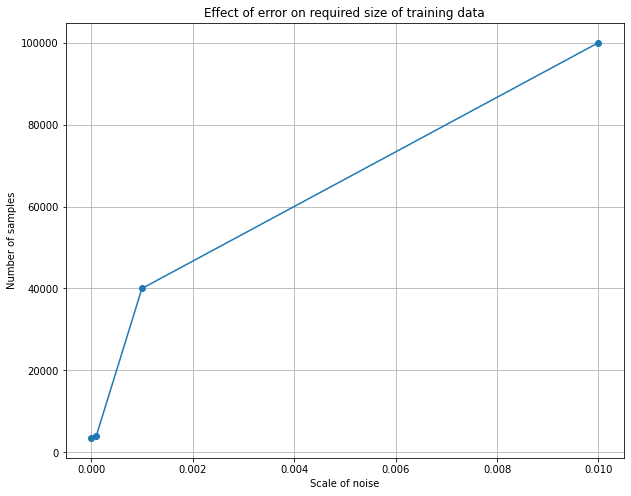

In [29]:
x = [0,10**-4,10**-3,10**-2]
y = [3500,4000,40000,100000]

fig = plt.figure(figsize=(10, 8))
plt.plot(x,y,marker='o')
plt.xlabel("Scale of noise")
plt.ylabel("Number of samples")
plt.title('Effect of error on required size of training data')
plt.grid(True)
fig.show() 